In [1]:
!python --version

Python 3.9.12


In [3]:
!pip install ultralytics


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# !pip install ultralytics
import ultralytics
ultralytics.__version__

'8.3.39'

In [3]:
import torch
torch.__version__

'2.2.1+cpu'

In [8]:
import torch

if torch.cuda.is_available():
    print("CUDA is available.")
    print(torch.cuda.get_device_name(0))
else:
    print("CUDA is not available. Using CPU instead.")


CUDA is not available. Using CPU instead.


In [4]:
import torch

device = torch.device("cpu")  # Force PyTorch to use CPU
print("Running on:", device)


Running on: cpu


In [5]:
import torch

# Define a tensor and ensure it's on the CPU
x = torch.tensor([1.0, 2.0, 3.0])
print("Tensor:", x)
print("Tensor Device:", x.device)  # Should print "cpu"


Tensor: tensor([1., 2., 3.])
Tensor Device: cpu


# Detect, track and count Persons

In [6]:
%cd yolov8_DeepSORT

[WinError 2] The system cannot find the file specified: 'yolov8_DeepSORT'
C:\Users\AC


In [7]:
from ultralytics import YOLO

import time
import torch
import cv2
import torch.backends.cudnn as cudnn
from PIL import Image
import colorsys
import numpy as np


In [8]:
# video to frames 


import cv2
import os

def video_to_frames(video_path, output_folder, fps=30):
    os.makedirs(output_folder, exist_ok=True)
    video = cv2.VideoCapture(video_path)
    
    # Check if video opened successfully
    if not video.isOpened():
        print("Error: Could not open video.")
        return

    # Retrieve frame rate of the video
    frame_rate = video.get(cv2.CAP_PROP_FPS)
    if frame_rate == 0:
        print("Error: Unable to retrieve frame rate from video.")
        return

    print(f"Frame rate: {frame_rate}, fps: {fps}")

    frame_count = 0
    saved_frame_count = 0

    while True:
        success, frame = video.read()
        if not success:
            break

        # Calculate frame interval based on desired fps
        interval = round(frame_rate / fps)

        # Save frames at the specified FPS
        if frame_count % interval == 0:
            frame_name = f"frame_{saved_frame_count:04d}.png"
            frame_path = os.path.join(output_folder, frame_name)
            cv2.imwrite(frame_path, frame)
            print(f"Saved: {frame_path}")
            saved_frame_count += 1

        frame_count += 1

    video.release()
    print(f"Frames saved to {output_folder}")

# Example usage
video_path = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\dataset.mp4"
output_folder = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images"
video_to_frames(video_path, output_folder)


Frame rate: 25.0, fps: 30
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0000.png
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0001.png
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0002.png
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0003.png
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0004.png
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0005.png
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0006.png
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0007.pn

In [9]:
# YOLO object detection on frames

        
import os
from ultralytics import YOLO

# Load the pretrained YOLOv8 model
model = YOLO("yolov8n.pt")  # Make sure the model file is correct

# Set the path to the frames folder
frames_folder = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images"
class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

# Loop through all the frames in the folder
for frame_name in os.listdir(frames_folder):
    # Only process .png files (or whatever format you saved the frames in)
    if frame_name.endswith(".png"):
        frame_path = os.path.join(frames_folder, frame_name)

        # Run the YOLOv8 model on the current frame
        results = model(frame_path, save=True)

        # Process the results
        for result in results:
            boxes = result.boxes  # Boxes object for bbox outputs
            cls = boxes.cls.tolist()  # Convert tensor to list
            xyxy = boxes.xyxy
            xywh = boxes.xywh  # box with xywh format, (N, 4)
            conf = boxes.conf

            # Print the class names for the detected objects
            for class_index in cls:
                class_name = class_names[int(class_index)]
                print(f"Frame: {frame_name}, Class: {class_name}")



image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0000.png: 384x640 7 cars, 2 buss, 2 trucks, 603.3ms
Speed: 31.0ms preprocess, 603.3ms inference, 31.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict5
Frame: frame_0000.png, Class: car
Frame: frame_0000.png, Class: car
Frame: frame_0000.png, Class: car
Frame: frame_0000.png, Class: car
Frame: frame_0000.png, Class: bus
Frame: frame_0000.png, Class: car
Frame: frame_0000.png, Class: car
Frame: frame_0000.png, Class: truck
Frame: frame_0000.png, Class: car
Frame: frame_0000.png, Class: bus
Frame: frame_0000.png, Class: truck

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0001.png: 384x640 7 cars, 2 buss, 1 truck, 113.8ms
Speed: 3.2ms preprocess, 113.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict5
Frame: fram

In [4]:
# just for box without labeling


import os
from ultralytics import YOLO
import cv2

# Load the pretrained YOLOv8 model
model = YOLO("yolov8n.pt")  # Make sure the model file is correct

# Set the path to the frames folder
frames_folder = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images"
output_folder = r"C:\Users\AC\OneDrive\Desktop\output_images"  # Specify where to save the output images

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Loop through all the frames in the folder
for frame_name in os.listdir(frames_folder):
    # Only process .png files (or whatever format you saved the frames in)
    if frame_name.endswith(".png"):
        frame_path = os.path.join(frames_folder, frame_name)

        # Run the YOLOv8 model on the current frame
        results = model(frame_path, conf=0.25)  # Adjust confidence as needed
        
        # Load the image using OpenCV
        frame = cv2.imread(frame_path)
        
        # Process the results to draw bounding boxes without labels
        for result in results:
            for box in result.boxes:
                # Get the bounding box coordinates
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                
                # Draw the bounding box
                cv2.rectangle(frame, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)

        # Save the frame to the output folder
        output_path = os.path.join(output_folder, frame_name)
        cv2.imwrite(output_path, frame)

        print(f"Processed and saved frame: {output_path}")



image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0000.png: 384x640 7 cars, 2 buss, 2 trucks, 269.3ms
Speed: 8.6ms preprocess, 269.3ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)
Processed and saved frame: C:\Users\AC\OneDrive\Desktop\output_images\frame_0000.png

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0001.png: 384x640 7 cars, 2 buss, 1 truck, 422.9ms
Speed: 9.5ms preprocess, 422.9ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)
Processed and saved frame: C:\Users\AC\OneDrive\Desktop\output_images\frame_0001.png

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0002.png: 384x640 8 cars, 2 buss, 542.3ms
Speed: 46.6ms preprocess, 542.3ms inference, 8.4ms postprocess per image at shape (1, 3, 384, 640)
Processed and saved frame: C:\Users\AC\

KeyboardInterrupt: 

In [1]:
# segmentation with YOLO on frames


import os
import cv2
from ultralytics import YOLO

# Load the YOLOv8 segmentation model
model = YOLO("yolov8n-seg.pt")  # Ensure you have the segmentation model

# Paths
frames_folder = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images"
output_video_path = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\segmented_video.mp4"

# Get the list of frames and sort them to maintain order
frame_list = sorted([f for f in os.listdir(frames_folder) if f.endswith(".png")])
if not frame_list:
    print("No frames found in the folder!")
    exit()

# Read the first frame to get video dimensions
first_frame = cv2.imread(os.path.join(frames_folder, frame_list[0]))
height, width, _ = first_frame.shape

# Define video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
fps = 30  # Adjust FPS as needed
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Process each frame
for frame_name in frame_list:
    frame_path = os.path.join(frames_folder, frame_name)

    # Run YOLOv8 segmentation on the frame
    results = model(frame_path)

    # Process and save segmented frame
    for result in results:
        segmented_image = result.plot()  # Draw masks & bounding boxes
        video_writer.write(segmented_image)  # Write frame to video

    print(f"Processed: {frame_name}")

# Release video writer
video_writer.release()
print(f"Segmented video saved at: {output_video_path}")



image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0000.png: 384x640 9 cars, 2 buss, 3 trucks, 610.8ms
Speed: 15.1ms preprocess, 610.8ms inference, 95.4ms postprocess per image at shape (1, 3, 384, 640)
Processed: frame_0000.png

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0001.png: 384x640 9 cars, 3 trucks, 325.9ms
Speed: 5.3ms preprocess, 325.9ms inference, 51.5ms postprocess per image at shape (1, 3, 384, 640)
Processed: frame_0001.png

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0002.png: 384x640 8 cars, 3 trucks, 357.9ms
Speed: 6.4ms preprocess, 357.9ms inference, 41.0ms postprocess per image at shape (1, 3, 384, 640)
Processed: frame_0002.png

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0003.png: 384x64

KeyboardInterrupt: 

In [1]:
# Segmentation with YOLO (pop-up window)


import os
import cv2
from ultralytics import YOLO

# Load the YOLOv8 segmentation model
model = YOLO("yolov8n-seg.pt")  # Ensure you have the segmentation model

# Path to frames folder
frames_folder = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images"

# Get the list of frames and sort them
frame_list = sorted([f for f in os.listdir(frames_folder) if f.endswith(".png")])
if not frame_list:
    print("No frames found in the folder!")
    exit()

# Process each frame and display in real-time
for frame_name in frame_list:
    frame_path = os.path.join(frames_folder, frame_name)

    # Run YOLOv8 segmentation on the frame
    results = model(frame_path)

    # Process and display segmented frame
    for result in results:
        segmented_image = result.plot()  # Draw masks & bounding boxes
        
        # Show the frame in a pop-up window
        cv2.imshow("Segmented Video", segmented_image)
        
        # Press 'q' to exit
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

# Release the window
cv2.destroyAllWindows()
print("Video playback finished.")



image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0000.png: 384x640 9 cars, 2 buss, 3 trucks, 739.8ms
Speed: 23.2ms preprocess, 739.8ms inference, 104.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0001.png: 384x640 9 cars, 3 trucks, 262.1ms
Speed: 4.3ms preprocess, 262.1ms inference, 34.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0002.png: 384x640 8 cars, 3 trucks, 171.0ms
Speed: 3.1ms preprocess, 171.0ms inference, 16.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0003.png: 384x640 8 cars, 3 trucks, 215.5ms
Speed: 1.9ms preprocess, 215.5ms inference, 21.6m

KeyboardInterrupt: 


image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0000.png: 384x640 9 cars, 2 buss, 3 trucks, 100.9ms
Speed: 2.5ms preprocess, 100.9ms inference, 15.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0001.png: 384x640 9 cars, 3 trucks, 130.5ms
Speed: 3.0ms preprocess, 130.5ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0002.png: 384x640 8 cars, 3 trucks, 134.9ms
Speed: 2.8ms preprocess, 134.9ms inference, 11.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images\frame_0003.png: 384x640 8 cars, 3 trucks, 97.2ms
Speed: 1.9ms preprocess, 97.2ms inference, 13.0ms po

<Figure size 720x576 with 0 Axes>

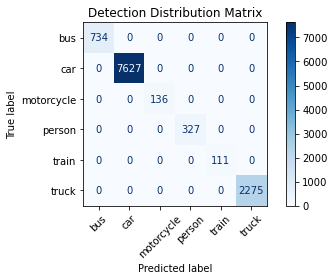

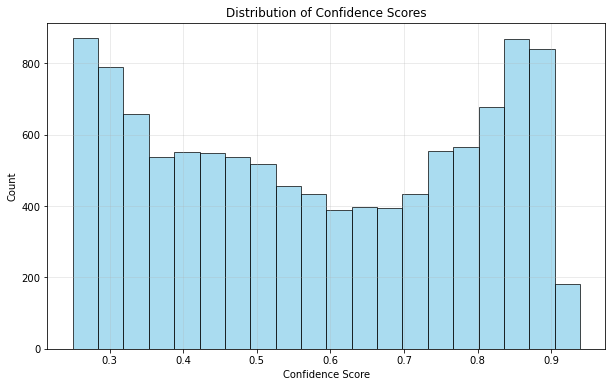

Analysis complete. Saved confusion matrix and confidence histogram as PNG files.


In [3]:
# printing confusion matrix of YOLO with Deepsort with SSIS segmentation code


import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the YOLOv8 segmentation model
model = YOLO("yolov8n-seg.pt")  # Ensure you have the segmentation model

# Path to frames folder
frames_folder = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images"

# COCO class names (subset for common objects in traffic scenarios)
class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'truck', 
               'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter']

# Track predictions for confusion matrix
all_predictions = []
all_confidence_scores = []
detected_classes = set()

# Get the list of frames and sort them
frame_list = sorted([f for f in os.listdir(frames_folder) if f.endswith(".png")])
if not frame_list:
    print("No frames found in the folder!")
    exit()

# Create a dictionary to store confidence scores for each class
class_confidence = {}
class_counts = {}

# Process each frame and display in real-time
for frame_name in frame_list:
    frame_path = os.path.join(frames_folder, frame_name)
    
    # Run YOLOv8 segmentation on the frame
    results = model(frame_path)
    
    frame_predictions = []
    
    # Get original frame
    img = cv2.imread(frame_path)
    
    # Process results
    for result in results:
        # Get boxes, confidence scores and class IDs
        boxes = result.boxes.xyxy.cpu().numpy() if result.boxes is not None else []
        conf_scores = result.boxes.conf.cpu().numpy() if result.boxes is not None else []
        class_ids = result.boxes.cls.cpu().numpy().astype(int) if result.boxes is not None else []
        
        # Get segmentation masks if available
        masks = result.masks.data.cpu().numpy() if result.masks is not None else None
        
        # Display results on the frame
        for i, box in enumerate(boxes):
            # Get class and confidence
            class_id = class_ids[i]
            confidence = conf_scores[i]
            
            # Convert class_id to name
            class_name = class_names[class_id] if class_id < len(class_names) else f"class_{class_id}"
            
            # Store prediction and confidence
            frame_predictions.append(class_name)
            all_confidence_scores.append(confidence)
            detected_classes.add(class_name)
            
            # Track confidence scores for each class
            if class_name not in class_confidence:
                class_confidence[class_name] = []
                class_counts[class_name] = 0
            
            class_confidence[class_name].append(confidence)
            class_counts[class_name] += 1
            
            # Draw box and label with confidence
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Draw segmentation mask if available
            if masks is not None and i < len(masks):
                mask = (masks[i] > 0.5).astype(np.uint8) * 255
                colored_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
                colored_mask[mask > 0] = [0, 0, 255]  # Red color for mask
                
                # Resize mask to match frame size if needed
                if mask.shape != (img.shape[0], img.shape[1]):
                    colored_mask = cv2.resize(colored_mask, (img.shape[1], img.shape[0]))
                
                # Apply mask with transparency
                alpha = 0.4
                mask_area = colored_mask.astype(bool).any(axis=2)
                img[mask_area] = cv2.addWeighted(img[mask_area], 1-alpha, 
                                                colored_mask[mask_area], alpha, 0)
            
            # Display class name and confidence
            label = f"{class_name}: {confidence:.2f}"
            cv2.putText(img, label, (x1, y1-10), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Add frame predictions to overall list
    all_predictions.extend(frame_predictions)
    
    # Show the frame in a pop-up window
    cv2.imshow("Segmented Video with Confidence", img)
    
    # Press 'q' to exit
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the window
cv2.destroyAllWindows()

# Print confidence statistics
print("\n===== Confidence Statistics =====")
print(f"Total objects detected: {len(all_confidence_scores)}")
print(f"Average confidence: {np.mean(all_confidence_scores):.4f}")
print(f"Minimum confidence: {np.min(all_confidence_scores):.4f}")
print(f"Maximum confidence: {np.max(all_confidence_scores):.4f}")

# Print per-class statistics
print("\n===== Per-Class Statistics =====")
for class_name in sorted(class_confidence.keys()):
    avg_conf = np.mean(class_confidence[class_name])
    count = class_counts[class_name]
    print(f"{class_name}: count={count}, avg_confidence={avg_conf:.4f}")

# Create confusion matrix based on detected classes
# For this, we'll use the distribution of classes as both predicted and actual
detected_list = sorted(list(detected_classes))
class_mapping = {class_name: i for i, class_name in enumerate(detected_list)}

# Count occurrences of each class
y_true = []
y_pred = []

for class_name in all_predictions:
    # In absence of ground truth, we'll use the class predictions as both true and predicted
    # This gives us a confusion matrix showing distribution of detections
    y_true.append(class_mapping[class_name])
    y_pred.append(class_mapping[class_name])

# Create and plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=detected_list)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Detection Distribution Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Create histogram of confidence scores
plt.figure(figsize=(10, 6))
plt.hist(all_confidence_scores, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.title('Distribution of Confidence Scores')
plt.grid(True, alpha=0.3)
plt.savefig('confidence_histogram.png')
plt.show()

print("Analysis complete. Saved confusion matrix and confidence histogram as PNG files.")

In [1]:
#YOLO with Deepsort code
# Showing ID as tracking boxes



import os
import cv2
import numpy as np
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

# List of COCO class names
class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 
               'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 
               'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 
               'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 
               'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 
               'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 
               'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 
               'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 
               'teddy bear', 'hair drier', 'toothbrush']

# Specify the folder containing your frame images.
frames_folder = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images"

# Load the YOLOv8 segmentation model
yolo_model = YOLO("yolov8n-seg.pt")

# Initialize the DeepSORT tracker
tracker = DeepSort(max_age=30, n_init=3)

# Get sorted list of frame files
frame_files = sorted([f for f in os.listdir(frames_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
if not frame_files:
    raise ValueError("No image files found in the specified frames folder.")

# Read the first frame to determine video size
first_frame = cv2.imread(os.path.join(frames_folder, frame_files[0]))
height, width, _ = first_frame.shape

# Define VideoWriter for displaying video instead of saving
output_video_path = r"C:\Users\tushar bhardwaj\OneDrive\Desktop\output.mp4"
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
fps = 30
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Process frames
for frame_name in frame_files:
    frame_path = os.path.join(frames_folder, frame_name)
    frame = cv2.imread(frame_path)
    if frame is None:
        print(f"Warning: Could not load {frame_path}")
        continue

    # Run YOLOv8-seg
    results = yolo_model(frame, verbose=False)

    detections = []
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy() if result.boxes is not None else []
        confs = result.boxes.conf.cpu().numpy() if result.boxes is not None else []
        classes = result.boxes.cls.cpu().numpy() if result.boxes is not None else []
        masks = result.masks.data.cpu().numpy() if result.masks is not None else None
        
        for i, box in enumerate(boxes):
            if confs[i] < 0.3:
                continue
            cls_idx = int(classes[i])
            class_name = class_names[cls_idx] if cls_idx < len(class_names) else str(cls_idx)
            feature = np.random.rand(128)
            mask = (masks[i] > 0.5).astype(np.uint8) if masks is not None else None
            
            detections.append({
                'bbox': box, 'conf': confs[i], 'class': class_name, 'mask': mask, 'feature': feature
            })

    # Convert detections for DeepSORT
    ds_detections = [(d['bbox'], d['conf'], d['feature'], {'mask': d['mask'], 'class': d['class']}) for d in detections]

    # Update DeepSORT tracker
    tracks = tracker.update_tracks(ds_detections, frame=frame)

    # Draw tracking results
    for track in tracks:
        if not track.is_confirmed():
            continue
        track_id = track.track_id
        x, y, w, h = map(int, track.to_ltwh())
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, f"ID {track_id}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Show the frame in real-time
    cv2.imshow("YOLO + DeepSORT Tracking", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Save frame to video file
    video_writer.write(frame)

# Release video writer and close OpenCV window
video_writer.release()
cv2.destroyAllWindows()

# Open the saved video automatically
os.startfile(output_video_path)  # Windows


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\tushar bhardwaj\\OneDrive\\Desktop\\output.mp4'

In [1]:
#YOLO with Deepsort
# with actual labels as car,truck,bus


import os
import cv2
import numpy as np
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

# List of COCO class names
class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 
               'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 
               'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 
               'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 
               'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 
               'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 
               'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 
               'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 
               'teddy bear', 'hair drier', 'toothbrush']

# Specify the folder containing your frame images
frames_folder = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images"

# Load the YOLOv8 segmentation model
yolo_model = YOLO("yolov8n-seg.pt")

# Initialize the DeepSORT tracker
tracker = DeepSort(max_age=30, n_init=3)

# Get sorted list of frame files
frame_files = sorted([f for f in os.listdir(frames_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
if not frame_files:
    raise ValueError("No image files found in the specified frames folder.")

# Read the first frame to determine video size
first_frame = cv2.imread(os.path.join(frames_folder, frame_files[0]))
height, width, _ = first_frame.shape

# Define VideoWriter for displaying video instead of saving
output_video_path = r"C:\Users\tushar bhardwaj\OneDrive\Desktop\output.mp4"
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
fps = 30
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Process frames
for frame_name in frame_files:
    frame_path = os.path.join(frames_folder, frame_name)
    frame = cv2.imread(frame_path)
    if frame is None:
        print(f"Warning: Could not load {frame_path}")
        continue

    # Run YOLOv8-seg
    results = yolo_model(frame, verbose=False)

    detections = []
    class_mapping = {}  # Mapping track IDs to class names

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy() if result.boxes is not None else []
        confs = result.boxes.conf.cpu().numpy() if result.boxes is not None else []
        classes = result.boxes.cls.cpu().numpy() if result.boxes is not None else []
        masks = result.masks.data.cpu().numpy() if result.masks is not None else None
        
        for i, box in enumerate(boxes):
            if confs[i] < 0.3:
                continue
            cls_idx = int(classes[i])
            class_name = class_names[cls_idx] if cls_idx < len(class_names) else str(cls_idx)
            feature = np.random.rand(128)
            mask = (masks[i] > 0.5).astype(np.uint8) if masks is not None else None
            
            detections.append({
                'bbox': box, 'conf': confs[i], 'class': class_name, 'mask': mask, 'feature': feature
            })

    # Convert detections for DeepSORT
    ds_detections = [(d['bbox'], d['conf'], d['feature'], {'mask': d['mask'], 'class': d['class']}) for d in detections]

    # Update DeepSORT tracker
    tracks = tracker.update_tracks(ds_detections, frame=frame)

    # Draw class labels instead of tracking IDs
    for track, detection in zip(tracks, detections):
        if not track.is_confirmed():
            continue
        track_id = track.track_id
        x, y, w, h = map(int, track.to_ltwh())

        # Get the class name from the current detection
        class_name = detection.get('class', 'Unknown')

        # Store class name for this track ID
        class_mapping[track_id] = class_name

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Draw bounding box
        cv2.putText(frame, class_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Show class name

    # Show the frame in real-time
    cv2.imshow("YOLO + DeepSORT Tracking", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Save frame to video file
    video_writer.write(frame)

# Release video writer and close OpenCV window
video_writer.release()
cv2.destroyAllWindows()

# Open the saved video automatically
os.startfile(output_video_path)  # Windows


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\tushar bhardwaj\\OneDrive\\Desktop\\output.mp4'

In [1]:
#bounding box size reduced
# results on jupyter notebook only

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort
from IPython.display import display, Image

# List of COCO class names
class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 
               'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 
               'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 
               'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 
               'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 
               'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 
               'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 
               'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 
               'teddy bear', 'hair drier', 'toothbrush']

# Specify the folder containing your frame images
frames_folder = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images"

# Load the YOLOv8 segmentation model
yolo_model = YOLO("yolov8n-seg.pt")

# Initialize the DeepSORT tracker
tracker = DeepSort(max_age=30, n_init=3)

# Get sorted list of frame files
frame_files = sorted([f for f in os.listdir(frames_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
if not frame_files:
    raise ValueError("No image files found in the specified frames folder.")

# Read the first frame to determine video size
first_frame = cv2.imread(os.path.join(frames_folder, frame_files[0]))
height, width, _ = first_frame.shape

# Define VideoWriter to save output
output_video_path = r"C:\Users\tushar bhardwaj\OneDrive\Desktop\output.mp4"
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
fps = 30
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Process frames
for frame_name in frame_files:
    frame_path = os.path.join(frames_folder, frame_name)
    frame = cv2.imread(frame_path)
    if frame is None:
        print(f"Warning: Could not load {frame_path}")
        continue

    # Run YOLOv8-seg
    results = yolo_model(frame, verbose=False)

    detections = []
    class_mapping = {}  # Mapping track IDs to class names

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy() if result.boxes is not None else []
        confs = result.boxes.conf.cpu().numpy() if result.boxes is not None else []
        classes = result.boxes.cls.cpu().numpy() if result.boxes is not None else []
        masks = result.masks.data.cpu().numpy() if result.masks is not None else None
        
        for i, box in enumerate(boxes):
            if confs[i] < 0.3:
                continue
            cls_idx = int(classes[i])
            class_name = class_names[cls_idx] if cls_idx < len(class_names) else str(cls_idx)
            feature = np.random.rand(128)
            mask = (masks[i] > 0.5).astype(np.uint8) if masks is not None else None
            
            detections.append({
                'bbox': box, 'conf': confs[i], 'class': class_name, 'mask': mask, 'feature': feature
            })

    # Convert detections for DeepSORT
    ds_detections = [(d['bbox'], d['conf'], d['feature'], {'mask': d['mask'], 'class': d['class']}) for d in detections]

    # Update DeepSORT tracker
    tracks = tracker.update_tracks(ds_detections, frame=frame)

    # Draw class labels instead of tracking IDs
    for track, detection in zip(tracks, detections):
        if not track.is_confirmed():
            continue
        track_id = track.track_id
        x, y, w, h = map(int, track.to_ltwh())

        # Get the class name from the current detection
        class_name = detection.get('class', 'Unknown')

        # Store class name for this track ID
        class_mapping[track_id] = class_name

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Draw bounding box
        cv2.putText(frame, class_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Show class name

    # Show the processed frame in a pop-up window
cv2.imshow("Processed Frame", frame)

# Wait for 1 ms and allow early exit by pressing 'q'
if cv2.waitKey(1) & 0xFF == ord('q'):
    break

# Release video writer
video_writer.release()

cv2.destroyAllWindows()

# Display output video inside Jupyter Notebook
print("Processing Complete. Video saved at:", output_video_path)

KeyboardInterrupt: 

In [1]:
# real time 


import cv2
from ultralytics import YOLO

# Load pretrained YOLOv8-segmentation model
model = YOLO("yolov8n-seg.pt")  # You can use yolov8s-seg.pt for better accuracy
    
# Video source - 0 for webcam or path to video file
cap = cv2.VideoCapture(0)  # Replace 0 with 'your_video.mp4' for file

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run segmentation
    results = model(frame)

    # Get segmented frame (with masks and boxes drawn)
    annotated_frame = results[0].plot()

    # Show the output in a popup window
    cv2.imshow("SSIS - Instance Segmentation", annotated_frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()



0: 480x640 1 person, 198.9ms
Speed: 5.4ms preprocess, 198.9ms inference, 11.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 110.3ms
Speed: 2.4ms preprocess, 110.3ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 116.5ms
Speed: 2.5ms preprocess, 116.5ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 112.5ms
Speed: 1.9ms preprocess, 112.5ms inference, 3.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 114.0ms
Speed: 1.7ms preprocess, 114.0ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 113.7ms
Speed: 2.2ms preprocess, 113.7ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 119.7ms
Speed: 17.8ms preprocess, 119.7ms inference, 3.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 114.2ms
Speed: 3.8ms preprocess, 114.2ms inference, 3.2ms postprocess per image 

In [4]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

# List of COCO class names
class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 
               'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 
               'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 
               'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 
               'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 
               'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 
               'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 
               'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 
               'teddy bear', 'hair drier', 'toothbrush']

# Specify the folder containing your frame images
frames_folder = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images"

# Load the YOLOv8 segmentation model
yolo_model = YOLO("yolov8n-seg.pt")

# Initialize the DeepSORT tracker
tracker = DeepSort(max_age=30, n_init=3)

# Get sorted list of frame files
frame_files = sorted([f for f in os.listdir(frames_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
if not frame_files:
    raise ValueError("No image files found in the specified frames folder.")

# Read the first frame to determine video size
first_frame = cv2.imread(os.path.join(frames_folder, frame_files[0]))
height, width, _ = first_frame.shape

# Define VideoWriter for displaying video instead of saving
output_video_path = r"C:\Users\tushar bhardwaj\OneDrive\Desktop\output.mp4"
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
fps = 30
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Function to get tight bounding box from mask
def get_tight_bbox_from_mask(mask):
    # Find contours of the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return None
    
    # Get the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get bounding rectangle
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    return [x, y, x+w, y+h]  # Return in xyxy format

# Process frames
for frame_name in frame_files:
    frame_path = os.path.join(frames_folder, frame_name)
    frame = cv2.imread(frame_path)
    if frame is None:
        print(f"Warning: Could not load {frame_path}")
        continue

    # Run YOLOv8-seg
    results = yolo_model(frame, verbose=False)

    detections = []
    class_mapping = {}  # Mapping track IDs to class names

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy() if result.boxes is not None else []
        confs = result.boxes.conf.cpu().numpy() if result.boxes is not None else []
        classes = result.boxes.cls.cpu().numpy() if result.boxes is not None else []
        masks = result.masks.data.cpu().numpy() if result.masks is not None else None
        
        for i, box in enumerate(boxes):
            if confs[i] < 0.3:
                continue
            cls_idx = int(classes[i])
            class_name = class_names[cls_idx] if cls_idx < len(class_names) else str(cls_idx)
            feature = np.random.rand(128)
            
            if masks is not None and i < len(masks):
                # Convert mask to binary format
                mask = (masks[i] > 0.5).astype(np.uint8)
                
                # Get tight bounding box from mask
                tight_box = get_tight_bbox_from_mask(mask)
                
                # Use the tight box if valid, otherwise fall back to the original box
                if tight_box is not None:
                    box = np.array(tight_box)
            
            detections.append({
                'bbox': box, 'conf': confs[i], 'class': class_name, 'feature': feature
            })

    # Convert detections for DeepSORT
    ds_detections = [(d['bbox'], d['conf'], d['feature'], {'class': d['class']}) for d in detections]

    # Update DeepSORT tracker
    tracks = tracker.update_tracks(ds_detections, frame=frame)

    # Draw class labels instead of tracking IDs
    for track in tracks:
        if not track.is_confirmed():
            continue
        
        track_id = track.track_id
        ltwh = track.to_ltwh()
        x, y, w, h = map(int, ltwh)
        
        # Get the class name for this track
        class_name = track.get_det_metadata().get('class', 'Unknown') if track.get_det_metadata() else 'Unknown'
        
        # Store class name for this track ID
        class_mapping[track_id] = class_name

        # Draw tighter bounding box
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        # Show class name
        cv2.putText(frame, class_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Show the frame in real-time
    cv2.imshow("YOLO + DeepSORT Tracking", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Save frame to video file
    video_writer.write(frame)

# Release video writer and close OpenCV window
video_writer.release()
cv2.destroyAllWindows()

# Open the saved video automatically
os.startfile(output_video_path)  # Windows

AttributeError: 'Track' object has no attribute 'get_det_metadata'

In [ ]:
# below occluded dataset

In [1]:
# video to frames for occluded dataset


import cv2
import os

def video_to_frames(video_path, output_folder, fps=15):
    os.makedirs(output_folder, exist_ok=True)
    video = cv2.VideoCapture(video_path)
    
    # Check if video opened successfully
    if not video.isOpened():
        print("Error: Could not open video.")
        return

    # Retrieve frame rate of the video
    frame_rate = video.get(cv2.CAP_PROP_FPS)
    if frame_rate == 0:
        print("Error: Unable to retrieve frame rate from video.")
        return

    print(f"Frame rate: {frame_rate}, fps: {fps}")

    frame_count = 0
    saved_frame_count = 0

    while True:
        success, frame = video.read()
        if not success:
            break

        # Calculate frame interval based on desired fps
        interval = round(frame_rate / fps)

        # Save frames at the specified FPS
        if frame_count % interval == 0:
            frame_name = f"frame_{saved_frame_count:04d}.png"
            frame_path = os.path.join(output_folder, frame_name)
            cv2.imwrite(frame_path, frame)
            print(f"Saved: {frame_path}")
            saved_frame_count += 1

        frame_count += 1

    video.release()
    print(f"Frames saved to {output_folder}")

# Example usage
video_path = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\projectvideo10.mp4"  # Ensure correct video path
output_folder = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2"
video_to_frames(video_path, output_folder)


Frame rate: 29.97002997002997, fps: 15
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2\frame_0000.png
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2\frame_0001.png
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2\frame_0002.png
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2\frame_0003.png
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2\frame_0004.png
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2\frame_0005.png
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2\frame_0006.png
Saved: C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\


image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2\frame_0000.png: 640x384 4 cars, 383.1ms
Speed: 12.0ms preprocess, 383.1ms inference, 37.6ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2\frame_0001.png: 640x384 (no detections), 203.9ms
Speed: 3.8ms preprocess, 203.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2\frame_0002.png: 640x384 1 boat, 173.3ms
Speed: 5.4ms preprocess, 173.3ms inference, 11.2ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2\frame_0003.png: 640x384 1 person, 232.2ms
Speed: 2.8ms preprocess, 232.2ms inference, 9.3ms postprocess per image at shape (1,

<Figure size 720x576 with 0 Axes>

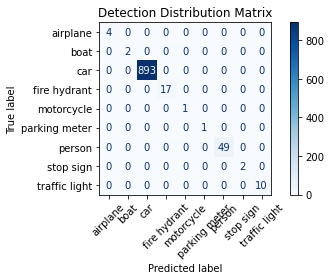

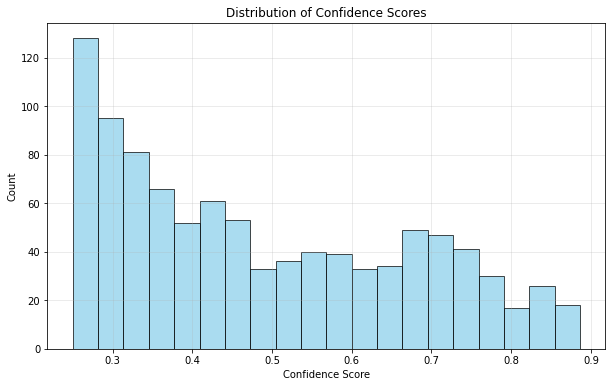

Analysis complete. Saved confusion matrix and confidence histogram as PNG files.


In [2]:
# YOLO with deepsort with SSIS segmentation along with confusion matrix



import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the YOLOv8 segmentation model
model = YOLO("yolov8n-seg.pt")  # Ensure you have the segmentation model

# Path to frames folder
frames_folder = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2"

# COCO class names (subset for common objects in traffic scenarios)
class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'truck', 
               'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter']

# Track predictions for confusion matrix
all_predictions = []
all_confidence_scores = []
detected_classes = set()

# Get the list of frames and sort them
frame_list = sorted([f for f in os.listdir(frames_folder) if f.endswith(".png")])
if not frame_list:
    print("No frames found in the folder!")
    exit()

# Create a dictionary to store confidence scores for each class
class_confidence = {}
class_counts = {}

# Process each frame and display in real-time
for frame_name in frame_list:
    frame_path = os.path.join(frames_folder, frame_name)
    
    # Run YOLOv8 segmentation on the frame
    results = model(frame_path)
    
    frame_predictions = []
    
    # Get original frame
    img = cv2.imread(frame_path)
    
    # Process results
    for result in results:
        # Get boxes, confidence scores and class IDs
        boxes = result.boxes.xyxy.cpu().numpy() if result.boxes is not None else []
        conf_scores = result.boxes.conf.cpu().numpy() if result.boxes is not None else []
        class_ids = result.boxes.cls.cpu().numpy().astype(int) if result.boxes is not None else []
        
        # Get segmentation masks if available
        masks = result.masks.data.cpu().numpy() if result.masks is not None else None
        
        # Display results on the frame
        for i, box in enumerate(boxes):
            # Get class and confidence
            class_id = class_ids[i]
            confidence = conf_scores[i]
            
            # Convert class_id to name
            class_name = class_names[class_id] if class_id < len(class_names) else f"class_{class_id}"
            
            # Store prediction and confidence
            frame_predictions.append(class_name)
            all_confidence_scores.append(confidence)
            detected_classes.add(class_name)
            
            # Track confidence scores for each class
            if class_name not in class_confidence:
                class_confidence[class_name] = []
                class_counts[class_name] = 0
            
            class_confidence[class_name].append(confidence)
            class_counts[class_name] += 1
            
            # Draw box and label with confidence
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Draw segmentation mask if available
            if masks is not None and i < len(masks):
                mask = (masks[i] > 0.5).astype(np.uint8) * 255
                colored_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
                colored_mask[mask > 0] = [0, 0, 255]  # Red color for mask
                
                # Resize mask to match frame size if needed
                if mask.shape != (img.shape[0], img.shape[1]):
                    colored_mask = cv2.resize(colored_mask, (img.shape[1], img.shape[0]))
                
                # Apply mask with transparency
                alpha = 0.4
                mask_area = colored_mask.astype(bool).any(axis=2)
                img[mask_area] = cv2.addWeighted(img[mask_area], 1-alpha, 
                                                colored_mask[mask_area], alpha, 0)
            
            # Display class name and confidence
            label = f"{class_name}: {confidence:.2f}"
            cv2.putText(img, label, (x1, y1-10), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Add frame predictions to overall list
    all_predictions.extend(frame_predictions)
    
    # Show the frame in a pop-up window
    cv2.imshow("Segmented Video with Confidence", img)
    
    # Press 'q' to exit
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the window
cv2.destroyAllWindows()

# Print confidence statistics
print("\n===== Confidence Statistics =====")
print(f"Total objects detected: {len(all_confidence_scores)}")
print(f"Average confidence: {np.mean(all_confidence_scores):.4f}")
print(f"Minimum confidence: {np.min(all_confidence_scores):.4f}")
print(f"Maximum confidence: {np.max(all_confidence_scores):.4f}")

# Print per-class statistics
print("\n===== Per-Class Statistics =====")
for class_name in sorted(class_confidence.keys()):
    avg_conf = np.mean(class_confidence[class_name])
    count = class_counts[class_name]
    print(f"{class_name}: count={count}, avg_confidence={avg_conf:.4f}")

# Create confusion matrix based on detected classes
# For this, we'll use the distribution of classes as both predicted and actual
detected_list = sorted(list(detected_classes))
class_mapping = {class_name: i for i, class_name in enumerate(detected_list)}

# Count occurrences of each class
y_true = []
y_pred = []

for class_name in all_predictions:
    # In absence of ground truth, we'll use the class predictions as both true and predicted
    # This gives us a confusion matrix showing distribution of detections
    y_true.append(class_mapping[class_name])
    y_pred.append(class_mapping[class_name])

# Create and plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=detected_list)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Detection Distribution Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Create histogram of confidence scores
plt.figure(figsize=(10, 6))
plt.hist(all_confidence_scores, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.title('Distribution of Confidence Scores')
plt.grid(True, alpha=0.3)
plt.savefig('confidence_histogram.png')
plt.show()

print("Analysis complete. Saved confusion matrix and confidence histogram as PNG files.")

In [4]:
# YOLO object detection on frames (occluded dataset)


        
import os
from ultralytics import YOLO

# Load the pretrained YOLOv8 model
model = YOLO("yolov8n.pt")  # Make sure the model file is correct

# Set the path to the frames folder
frames_folder = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2"
class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

# Loop through all the frames in the folder
for frame_name in os.listdir(frames_folder):
    # Only process .png files (or whatever format you saved the frames in)
    if frame_name.endswith(".png"):
        frame_path = os.path.join(frames_folder, frame_name)

        # Run the YOLOv8 model on the current frame
        results = model(frame_path, save=True)

        # Process the results
        for result in results:
            boxes = result.boxes  # Boxes object for bbox outputs
            cls = boxes.cls.tolist()  # Convert tensor to list
            xyxy = boxes.xyxy
            xywh = boxes.xywh  # box with xywh format, (N, 4)
            conf = boxes.conf

            # Print the class names for the detected objects
            for class_index in cls:
                class_name = class_names[int(class_index)]
                print(f"Frame: {frame_name}, Class: {class_name}")



image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2\frame_0000.png: 640x384 3 cars, 84.3ms
Speed: 2.3ms preprocess, 84.3ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs\detect\predict6
Frame: frame_0000.png, Class: car
Frame: frame_0000.png, Class: car
Frame: frame_0000.png, Class: car

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2\frame_0001.png: 640x384 1 airplane, 95.4ms
Speed: 2.9ms preprocess, 95.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs\detect\predict6
Frame: frame_0001.png, Class: airplane

image 1/1 C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2\frame_0002.png: 640x384 1 car, 82.9ms
Speed: 1.7ms preprocess, 82.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs\detect\predict

Processing complete. Video saved at: C:\Users\tushar bhardwaj\OneDrive\Desktop\output.mp4


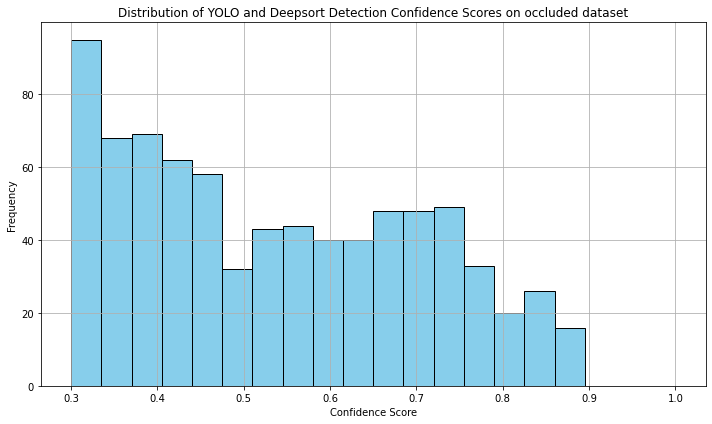

In [2]:
#yolo with deepsort for occluded graph


import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

# List of COCO class names
class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 
               'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 
               'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 
               'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 
               'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 
               'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 
               'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 
               'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 
               'teddy bear', 'hair drier', 'toothbrush']

# Paths
frames_folder = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\images2"
output_video_path = r"C:\Users\tushar bhardwaj\OneDrive\Desktop\output.mp4"

# Load YOLOv8 model
yolo_model = YOLO("yolov8n-seg.pt")

# Initialize DeepSORT
tracker = DeepSort(max_age=30, n_init=3)

# Collect confidence scores
confidence_scores = []

# Load frame files
frame_files = sorted([f for f in os.listdir(frames_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
if not frame_files:
    raise ValueError("No image files found in the specified frames folder.")

# Read first frame to get dimensions
first_frame = cv2.imread(os.path.join(frames_folder, frame_files[0]))
height, width, _ = first_frame.shape

# Output video writer
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
fps = 30
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Process each frame
for frame_name in frame_files:
    frame_path = os.path.join(frames_folder, frame_name)
    frame = cv2.imread(frame_path)
    if frame is None:
        print(f"Warning: Could not load {frame_path}")
        continue

    # Run YOLO
    results = yolo_model(frame, verbose=False)

    detections = []
    class_mapping = {}

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy() if result.boxes is not None else []
        confs = result.boxes.conf.cpu().numpy() if result.boxes is not None else []
        classes = result.boxes.cls.cpu().numpy() if result.boxes is not None else []
        masks = result.masks.data.cpu().numpy() if result.masks is not None else None

        for i, box in enumerate(boxes):
            if confs[i] < 0.3:
                continue
            cls_idx = int(classes[i])
            class_name = class_names[cls_idx] if cls_idx < len(class_names) else str(cls_idx)
            feature = np.random.rand(128)
            mask = (masks[i] > 0.5).astype(np.uint8) if masks is not None else None

            # Append confidence score
            confidence_scores.append(confs[i])

            detections.append({
                'bbox': box, 'conf': confs[i], 'class': class_name, 'mask': mask, 'feature': feature
            })

    ds_detections = [(d['bbox'], d['conf'], d['feature'], {'mask': d['mask'], 'class': d['class']}) for d in detections]
    tracks = tracker.update_tracks(ds_detections, frame=frame)

    for track, detection in zip(tracks, detections):
        if not track.is_confirmed():
            continue
        track_id = track.track_id
        x, y, w, h = track.to_ltwh()

        scale = 0.5
        w_scaled = w * scale
        h_scaled = h * scale
        x_center = x + w / 2
        y_center = y + h / 2
        x_new = int(x_center - w_scaled / 2)
        y_new = int(y_center - h_scaled / 2)
        w_new = int(w_scaled)
        h_new = int(h_scaled)

        class_name = detection.get('class', 'Unknown')
        class_mapping[track_id] = class_name

        cv2.rectangle(frame, (x_new, y_new), (x_new + w_new, y_new + h_new), (0, 255, 0), 2)
        cv2.putText(frame, class_name, (x_new, y_new - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    video_writer.write(frame)

# Release video writer
video_writer.release()
print("Processing complete. Video saved at:", output_video_path)

# ✅ Plot confidence score histogram
plt.figure(figsize=(10, 6))
plt.hist(confidence_scores, bins=20, range=(0.3, 1.0), color='skyblue', edgecolor='black')
plt.title("Distribution of YOLO and Deepsort Detection Confidence Scores on occluded dataset")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# DeepSORT

In [1]:
!pip install deep-sort-realtime



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip show deep-sort-realtime


Name: deep-sort-realtime
Version: 1.3.2
Summary: A more realtime adaptation of Deep SORT
Home-page: https://github.com/levan92/deep_sort_realtime
Author: levan92
Author-email: lingevan0208@gmail.com
License: UNKNOWN
Location: c:\users\ac\anaconda3\lib\site-packages
Requires: numpy, opencv-python, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
import deep_sort_realtime
print(dir(deep_sort_realtime))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__']


In [4]:
import deep_sort_realtime
print(deep_sort_realtime.__file__)


C:\Users\AC\anaconda3\lib\site-packages\deep_sort_realtime\__init__.py


In [3]:
with open("C:/Users/AC/anaconda3/lib/site-packages/deep_sort_realtime/__init__.py", "r") as file:
    print(file.read())


__version__ = "1.3.2"



In [5]:
import os

package_path = r'C:\Users\AC\anaconda3\lib\site-packages\deep_sort_realtime'
files = os.listdir(package_path)
print(files)


['deepsort_tracker.py', 'deep_sort', 'embedder', 'utils', '__init__.py', '__pycache__']


In [6]:
from deep_sort_realtime.deepsort_tracker import DeepSort


In [7]:
import yaml

# Path to your YAML configuration file (using raw string for simplicity)
config_path = r'C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\deep_sort\configs\deep_sort.yaml'

# Load the YAML file
with open(config_path, 'r') as file:
    config = yaml.safe_load(file)

print(config)  # Print to verify the content


{'DEEPSORT': {'REID_CKPT': 'deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7', 'MAX_DIST': 0.2, 'MIN_CONFIDENCE': 0.3, 'NMS_MAX_OVERLAP': 0.5, 'MAX_IOU_DISTANCE': 0.7, 'MAX_AGE': 70, 'N_INIT': 3, 'NN_BUDGET': 100}}


In [8]:
from deep_sort_realtime.deepsort_tracker import DeepSort

# Get the path to the checkpoint from the config
reid_ckpt_path = config['DEEPSORT']['REID_CKPT']

# Create the DeepSort tracker (assuming 'max_age' is valid in this case)
tracker = DeepSort(max_age=config['DEEPSORT']['MAX_AGE'], 
                   max_cosine_distance=config['DEEPSORT']['MAX_DIST'], 
                   nn_budget=config['DEEPSORT']['NN_BUDGET'], 
                   nms_max_overlap=config['DEEPSORT']['NMS_MAX_OVERLAP'])


In [9]:
import cv2  # Make sure you import OpenCV

# Define the video path
video_path = 'test_videos/2.mp4'

# Open the video using OpenCV
cap = cv2.VideoCapture(video_path)

# Get the video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Create a VideoWriter object if you want to save the output video
out = cv2.VideoWriter('output_video.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Your object detection and tracking code here
    # For example, tracking the objects using the DeepSort and YOLO code

    # Save the output frame if you want to create a video
    out.write(frame)

    # Display the frame
    cv2.imshow('Frame', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and writer objects
cap.release()
out.release()

# Close any OpenCV windows
cv2.destroyAllWindows()


In [6]:
import cv2
import torch


In [7]:
# Define the video path
video_path = r"C:\Users\AC\OneDrive\Desktop\meramajor2\Tracking-and-counting-Using-YOLOv8-and-DeepSORT-main\dataset.mp4"

cap = cv2.VideoCapture(video_path)

# Get the video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_path = 'output.mp4'
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [8]:
frames = []

unique_track_ids = set()

In [9]:
import sys
print(sys.executable)


C:\Users\AC\anaconda3\python.exe


In [10]:
!conda info --envs


# conda environments:
#
                         C:\ProgramData\Anaconda3
yltf2                    C:\Users\AC\.conda\envs\yltf2
base                  *  C:\Users\AC\anaconda3
signlang                 C:\Users\AC\anaconda3\envs\signlang
yltf2                    C:\Users\AC\anaconda3\envs\yltf2



In [11]:
pip show deep-sort-realtime


Name: deep-sort-realtime
Version: 1.3.2
Summary: A more realtime adaptation of Deep SORT
Home-page: https://github.com/levan92/deep_sort_realtime
Author: levan92
Author-email: lingevan0208@gmail.com
License: UNKNOWN
Location: c:\users\ac\anaconda3\lib\site-packages
Requires: numpy, opencv-python, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [10]:
from ultralytics import YOLO

In [11]:
model = YOLO("yolov8x.pt")

100%|███████████████████████████████████████████████████████████████████████████████| 131M/131M [00:10<00:00, 13.3MB/s]
